In [47]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
import numpy as np

### Préparation des données

In [2]:
### Ranking 1 : The Most Funded
funding = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_1.xlsx', header = 0)
### Ranking 2 : The most visited (alexaRank)
alexaRank = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_2.xlsx', header = 0)
### Ranking 3 : The most popular (twitter followers)
twitterFollowers = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_3.xlsx', header = 0)
### Ranking 4 : The Most Authoritative
domainAuthority = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_4.xlsx', header = 0)
### Ranking 5 : The most liked (on facebook)
facebookLikes = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_5.xlsx', header = 0)
### Ranking 6 : The Most Upvoted
huntVotes = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_6.xlsx', header = 0)
### Ranking 7 : The Fastest Growing
growthScore = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_7.xlsx', header = 0)
### Ranking 8 : The Most Prolific (number of statuses posted on company Twitter account)
tweetCount = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_8.xlsx', header = 0)
### Ranking 9 : The Most Influential (LinkedIn followers)
linkedinFollowers = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_9.xlsx', header = 0)
### Ranking 10 : The Most populous
employeesCount = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_10.xlsx', header = 0)
### Ranking 11 : The Most Cashed Out
exitValue = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_11.xlsx', header = 0)

In [3]:
funding.head()

,noms,batch,categories,descriptions,variable
0,Airbnb,W09,Consumer,Book accommodations around the world,"$6,000.3m"
1,Cruise,W14,Transport,Self-driving cars.,"$3,368.8m"
2,Instacart,S12,Consumer,Groceries delivered fast.,"$2,095.9m"
3,Dropbox,S07,Other SaaS,Backup and share files in the cloud.,"$2,057.2m"
4,DoorDash,S13,Consumer,Restaurant delivery.,"$2,000.0m"


In [4]:
### Create a list with all the ranking datasets
rankings = [funding, alexaRank, twitterFollowers, domainAuthority, facebookLikes, huntVotes, growthScore, tweetCount, linkedinFollowers, employeesCount, exitValue]

In [5]:
### Supprimer les $ et les m :
for dataset in [funding, exitValue]:
    dataset['variable'] = dataset['variable'].str[1:-1]

In [6]:
# Créer une fonction pour obtenir le nom du dataframe
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [7]:
# Enlever les virgules des milliers pour les colonnes qui en ont, et 
for dataset in rankings:
    if (dataset['variable'].dtype != 'int64') & (dataset['variable'].dtype != 'float64'):
        for count, value in enumerate(dataset['variable']):
            dataset.replace(dataset['variable'][count], value.replace(',', ''), inplace=True)
    else:
        print('La variable du dataframe ' + get_df_name(dataset) + ' est déjà sous une forme adaptée.')

La variable du dataframe domainAuthority est déjà sous une forme adaptée.


In [8]:
# Passer les variables d'intérêt d'objet à float.
for dataset in rankings:
    if (dataset['variable'].dtype != 'int64') & (dataset['variable'].dtype != 'float64'):
        for value in dataset['variable']:
            dataset['variable'] = dataset['variable'].astype({'variable': 'float64'})

In [9]:
# Changer le nom de la variable d'intérêt de chaque dataframe.
for dataset in rankings:
    dataset.rename(columns={'variable': get_df_name(dataset)}, inplace=True)

In [10]:
# Combiner les dataframe en un gros réunissant tout
mergedRankings = reduce(lambda  left,right: pd.merge(left,right,on=['noms', 'batch', 'categories', 'descriptions'],
                                            how='outer'), rankings)
mergedRankings.head()

,noms,batch,categories,descriptions,funding,alexaRank,twitterFollowers,domainAuthority,facebookLikes,huntVotes,growthScore,tweetCount,linkedinFollowers,employeesCount,exitValue
0,Airbnb,W09,Consumer,Book accommodations around the world,6000.3,234.0,695116.0,91.0,8754088.0,NaN,600.0,39485.0,NaN,6100.0,NaN
1,Cruise,W14,Transport,Self-driving cars.,3368.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1770.0,1000.0
2,Instacart,S12,Consumer,Groceries delivered fast.,2095.9,4536.0,31175.0,71.0,84839.0,NaN,NaN,40930.0,NaN,800.0,NaN
3,Dropbox,S07,Other SaaS,Backup and share files in the cloud.,2057.2,79.0,4371622.0,95.0,1351489.0,NaN,NaN,NaN,NaN,3740.0,NaN
4,DoorDash,S13,Consumer,Restaurant delivery.,2000.0,1649.0,117922.0,73.0,54532.0,NaN,930.0,NaN,NaN,1700.0,NaN


In [11]:
mergedRankings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 15 columns):
noms                 499 non-null object
batch                499 non-null object
categories           496 non-null object
descriptions         499 non-null object
funding              100 non-null float64
alexaRank            100 non-null float64
twitterFollowers     100 non-null float64
domainAuthority      100 non-null float64
facebookLikes        100 non-null float64
huntVotes            100 non-null float64
growthScore          100 non-null float64
tweetCount           100 non-null float64
linkedinFollowers    100 non-null float64
employeesCount       100 non-null float64
exitValue            73 non-null float64
dtypes: float64(11), object(4)
memory usage: 62.4+ KB


In [12]:
mergedRankings.nunique()

noms                 499
batch                 28
categories            15
descriptions         499
funding               94
alexaRank            100
twitterFollowers     100
domainAuthority       32
facebookLikes        100
huntVotes             93
growthScore           84
tweetCount           100
linkedinFollowers     88
employeesCount        56
exitValue             38
dtype: int64

### Relation entre les variables

In [24]:
for dataset in rankings[1:]:
    print('The number of common observations between funding and ' + str(get_df_name(dataset)) + ' is ' + str(len(mergedRankings) - sum(mergedRankings[['funding', get_df_name(dataset)]].apply(lambda x: sum(x.isnull().values), axis = 1)>0)))

The number of common observations between funding and alexaRank is 38
The number of common observations between funding and twitterFollowers is 35
The number of common observations between funding and domainAuthority is 33
The number of common observations between funding and facebookLikes is 25
The number of common observations between funding and huntVotes is 8
The number of common observations between funding and growthScore is 27
The number of common observations between funding and tweetCount is 32
The number of common observations between funding and linkedinFollowers is 24
The number of common observations between funding and employeesCount is 53
The number of common observations between funding and exitValue is 8


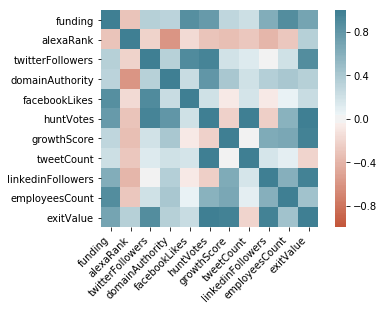

In [44]:
corr = mergedRankings.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

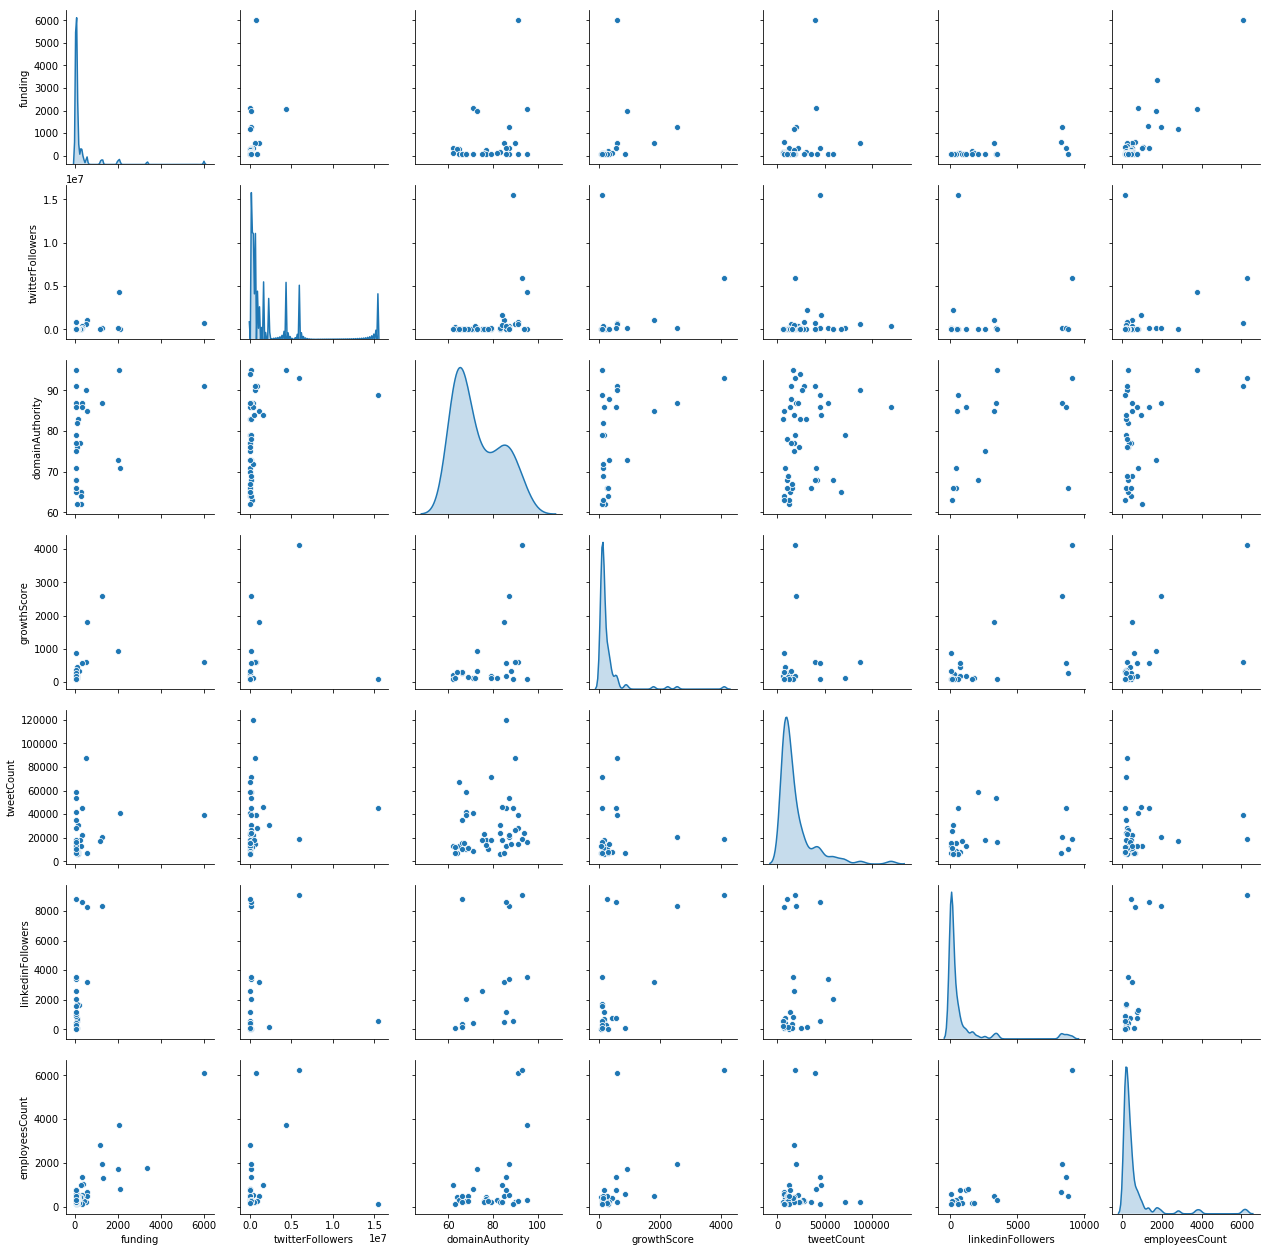

In [43]:
sns.pairplot(mergedRankings, vars=['funding', 'twitterFollowers', 'domainAuthority', 'growthScore', 'tweetCount', 'linkedinFollowers', 'employeesCount'], kind='scatter', diag_kind="kde")

###### Avec ces deux outils (matrice de corrélations et scatterplots), on voit des relations fortes apparaître. Nous allons sélectionner les relations qui nous paraissent les plus pertinentes étant données leur apparente corrélation et un nombre d'observations assez élevé, puis établir une régression. Des transformations seront établies sur les variables afin de mettre en évidence des relations non linéaires. Nous nous concentrerons ainsi sur les couples : funding/employeesCount, funding/domainAuthority, domainAuthority/growthScore, growthScore/linkedinFollowers, growthScore/tweetCount, linkedinFollowers/employeesCount, employeesCount/domainAuthority.

### Régressions

<function matplotlib.pyplot.show(*args, **kw)>

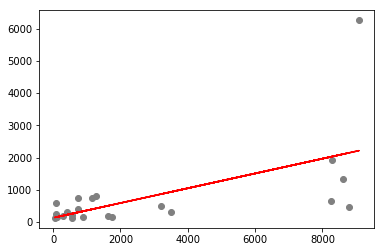

In [96]:
linkedinEmployees = mergedRankings[['linkedinFollowers', 'employeesCount']]
linkedinEmployees = linkedinEmployees.dropna()

tt = TransformedTargetRegressor(regressor=LinearRegression())#,
                                #func=np.log, inverse_func=np.exp)

X = linkedinEmployees.linkedinFollowers.values.reshape(-1, 1)
y = linkedinEmployees.employeesCount.values

fittedValues = tt.fit(X, y)
linkedinEmployeesPred = tt.predict(X)
linkedinEmployeesR2 = tt.score(X, y)
linkedinEmployeesCoeff = tt.regressor_.coef_

plt.scatter(X, y, color='grey')
plt.plot(X, linkedinEmployeesPred, color='red')
plt.show

In [135]:
linkedinEmployeesR2

0.7727882791175973

<function matplotlib.pyplot.show(*args, **kw)>

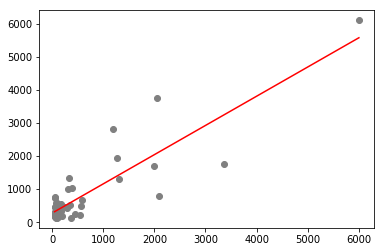

In [113]:
fundingEmployees = mergedRankings[['funding', 'employeesCount']]
fundingEmployees = fundingEmployees.dropna()

tt = TransformedTargetRegressor(regressor=LinearRegression())#,
                                #func=np.log, inverse_func=np.exp)

X = fundingEmployees.funding.values.reshape(-1, 1)
y = fundingEmployees.employeesCount.values

fittedValues = tt.fit(X, y)
fundingEmployeesPred = tt.predict(X)
fundingEmployeesR2 = tt.score(X, y)
fundingEmployeesCoeff = tt.regressor_.coef_

plt.scatter(X, y, color='grey')
plt.plot(X, fundingEmployeesPred, color='red')
plt.show

In [114]:
fundingEmployeesR2

0.7727882791175973

<function matplotlib.pyplot.show(*args, **kw)>

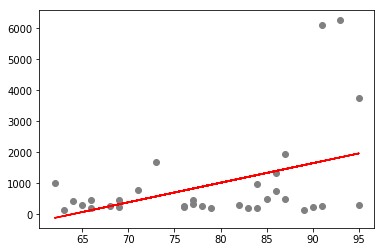

In [133]:
EmployeesDA = mergedRankings[['domainAuthority', 'employeesCount']]
EmployeesDA = EmployeesDA.dropna()

tt = TransformedTargetRegressor(regressor=LinearRegression())#,
                                #func=np.log, inverse_func=np.exp)

X = EmployeesDA.domainAuthority.values.reshape(-1, 1)
y = EmployeesDA.employeesCount.values

fittedValues = tt.fit(X, y)
EmployeesDAPred = tt.predict(X)
EmployeesDAR2 = tt.score(X, y)
EmployeesDACoeff = tt.regressor_.coef_

plt.scatter(X, y, color='grey')
plt.plot(X, EmployeesDAPred, color='red')
plt.show

In [134]:
DAEmployeesR2

0.17729039786754028

###### On peut voir qu'il existe des relations entre ces variables. Cependant, étant donné le faible nombre d'observations, les estimations sont peu précises. Notons qu'on obtient tout de même un R² de 0,77 pour les relations followers LinkedIn/nombre d'employés et capitalisation/nombre d'employés. Les transformations ne donnaient pas de meilleurs résultats que la régression linéaire.

### Analyse par promotion et par catégorie

In [145]:
len(mergedRankings.batch.unique()) ### 28 promotions différentes (diffèrent par année et par saison)

28

In [146]:
len(mergedRankings.categories.unique()) ### 16 catégories d'entreprises

16

In [223]:
promo_list = mergedRankings.batch.unique().tolist()
promo_list = sorted(sorted(promo_list, key=lambda x : x[0], reverse=True ), key=lambda x : int(x[1:3]))
categ_list = mergedRankings.categories.unique().tolist()

In [231]:
print('Capitalisation moyenne pour une startup de la promo :')
for promo in promo_list:
    if promo in str(funding.batch): 
        print(promo + ': ' + str(round(funding[funding.batch == promo].funding.mean(),1)) + 'M$')

Capitalisation moyenne pour une startup de la promo :
S05: 550.1M$
S06: 47.8M$
S07: 1059.0M$
W08: 390.3M$
W09: 6000.3M$
S09: 472.1M$
W10: 251.2M$
S10: 173.2M$
W11: 82.2M$
S11: 103.4M$
W12: 164.3M$
S12: 382.2M$
W13: 249.8M$
S13: 609.4M$
W14: 637.6M$
S14: 154.2M$
W15: 85.8M$
S15: 56.0M$
W16: 374.1M$
S16: 92.0M$
W17: 53.6M$
S17: 49.4M$


In [232]:
print('Valeur de revente moyenne pour une startup de la promo :')
for promo in promo_list:
    if promo in str(exitValue.batch): 
        print(promo + ': ' + str(round(exitValue[exitValue.batch == promo].exitValue.mean(),1)) + 'M$')

Valeur de revente moyenne pour une startup de la promo :
S05: 14.3M$
W06: 19.5M$
S06: 124.0M$
W07: 336.0M$
S07: 22.8M$
W08: 95.0M$
S08: 3.8M$
W09: 17.6M$
S09: 4.5M$
W10: 27.3M$
S10: 34.3M$
W11: 17.5M$
S11: 46.0M$
W12: 325.0M$
S12: 1.5M$
S13: 125.2M$
W14: 1000.0M$
S14: 20.0M$
W15: 65.0M$


C:\Users\moham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


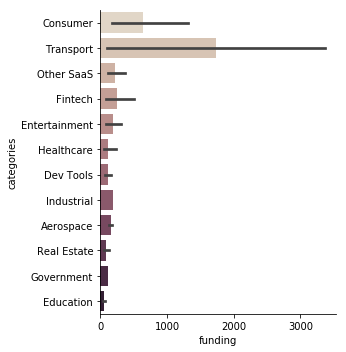

In [242]:
sns.catplot(x="funding", y="categories", palette="ch:.25", kind="bar", data=funding)

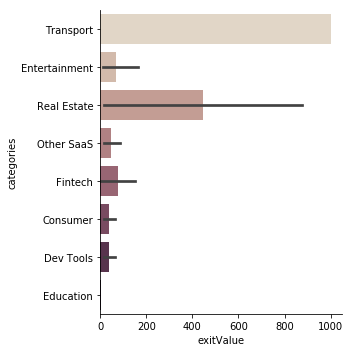

In [244]:
sns.catplot(x="exitValue", y="categories", palette="ch:.25", kind="bar", data=exitValue)

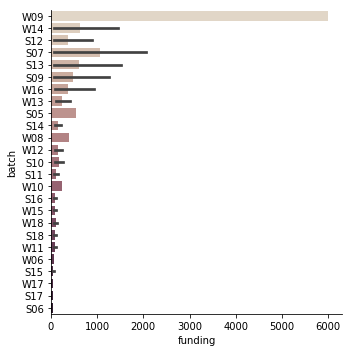

In [243]:
sns.catplot(x="funding", y="batch", palette="ch:.25", kind="bar", data=funding)

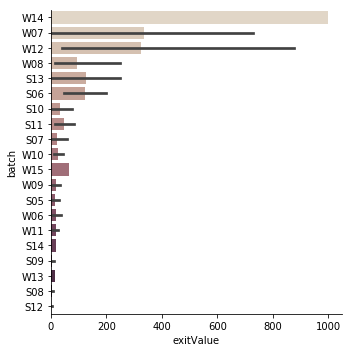

In [245]:
sns.catplot(x="exitValue", y="batch", palette="ch:.25", kind="bar", data=exitValue)